## Lineare Regression mit Tensorflow

In [15]:
#
# Einfache lineare Regression mit TensorFlow 2.x
#
import os
import random
import matplotlib
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [16]:
np.random.seed(42) # Damit wir immer die gleichen Zufallswerte bekommen
my_weight = 4 # Diese Variable muss später vom Modell gelernt werden.

In [17]:
# Ein Array von 100 Werten wird generiert.
input = np.arange(0, 10, 0.1,dtype="float32")
noise = np.random.uniform(-3,3,size=input.shape)

In [18]:
# Damit die Ausgabe nicht direkt linear ist, werden Zufallswerte hinzugefügt.
output = my_weight * input + noise
output = output.astype("float32")

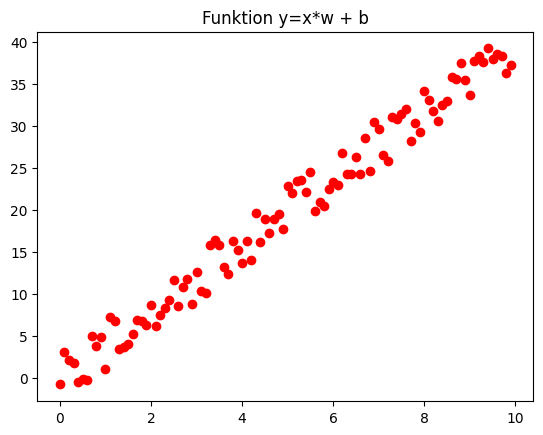

In [19]:
plt.title('Funktion y=x*w + b')
plt.scatter(input, output, c="red")
plt.show()

In [20]:
class MyLinearRegressionModel():
    def __init__(self):
        self.W = tf.Variable(np.random.uniform(),dtype="float32",trainable=True )
        self.b = tf.Variable(np.random.uniform(),dtype="float32",trainable=True )

    def __call__(self, x):
        return tf.add(tf.multiply(x,self.W), self.b)

In [21]:
model = MyLinearRegressionModel()

In [22]:
def loss_function(pred, y):
    return tf.reduce_mean(tf.square(pred - y))

In [23]:
learning_rate=0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

In [24]:
 # 2. Version mit tape.gradient() und optimizer
def train_with_optimizers(model,x,y):
    with tf.GradientTape() as tape:
        current_loss = loss_function(model(x), y)  
    gradients = tape.gradient(current_loss,[model.W,model.b])
    optimizer.apply_gradients(zip(gradients , [model.W,model.b]))
    return current_loss

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


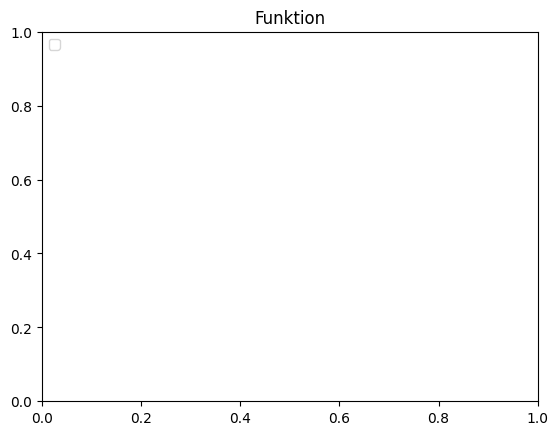

In [25]:
plt.ion()
plt.title('Funktion')
plt.legend(loc='upper left')

In [26]:
 # Update des plt.scatter() mit den neu berechneteten Werten
def redraw_curve(input,output,predicted_output,epoch,loss):
    plt.clf()
    plt.title("Epoch: " +str(epoch) +'\nLoss: ' + str(loss.numpy())+'\nFunktion y = x*w + b  mit w=' + str(model.W.numpy()) + ' und b=' + str(model.b.numpy()))
    plt.scatter(input,output,c="red",s=4,label="Original Werte")
    plt.scatter(input,predicted_output,s=5, c="g", label="Vorhersage")
    plt.show()  
    plt.draw()
    plt.pause(0.0001)

Current loss: 489.7436828613281


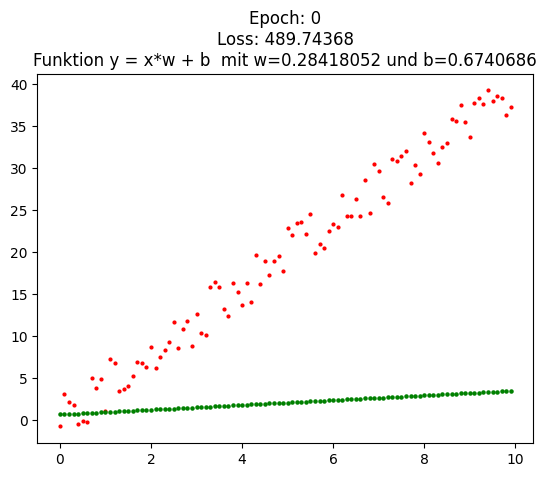

<Figure size 640x480 with 0 Axes>

Current loss: 426.6355895996094


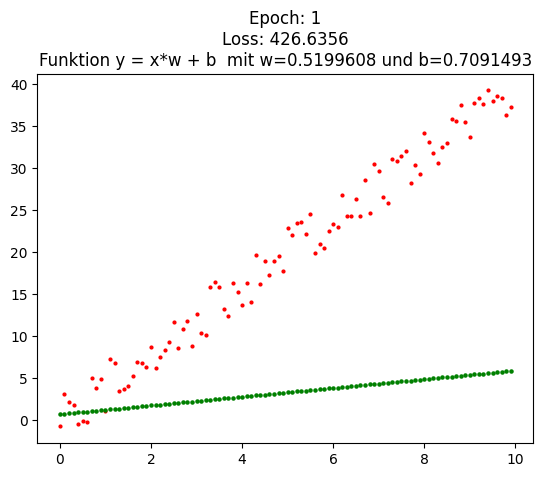

<Figure size 640x480 with 0 Axes>

Current loss: 371.7210693359375


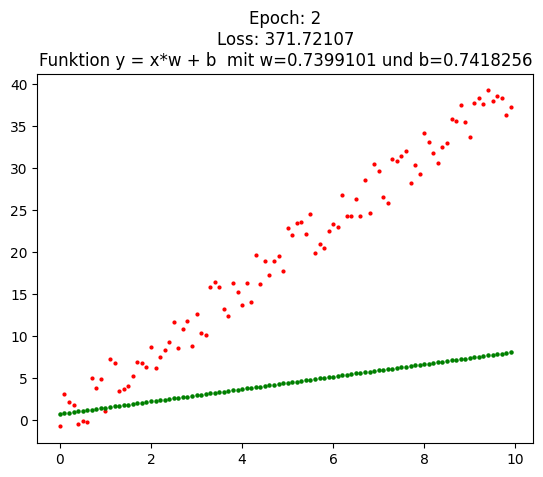

<Figure size 640x480 with 0 Axes>

Current loss: 323.93634033203125


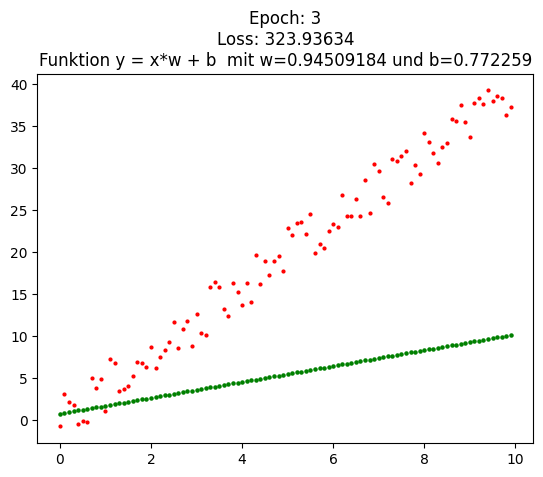

<Figure size 640x480 with 0 Axes>

Current loss: 282.3556823730469


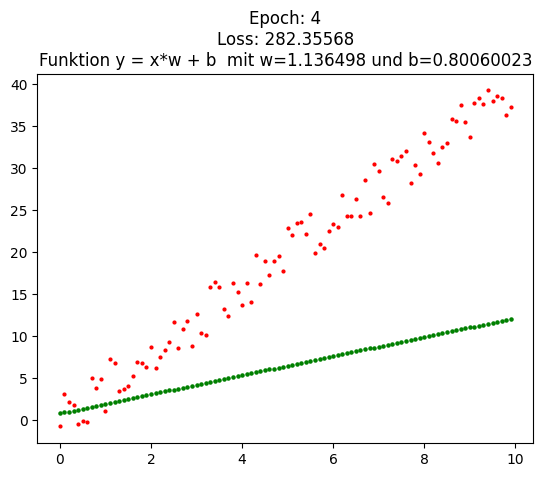

<Figure size 640x480 with 0 Axes>

Current loss: 246.17361450195312


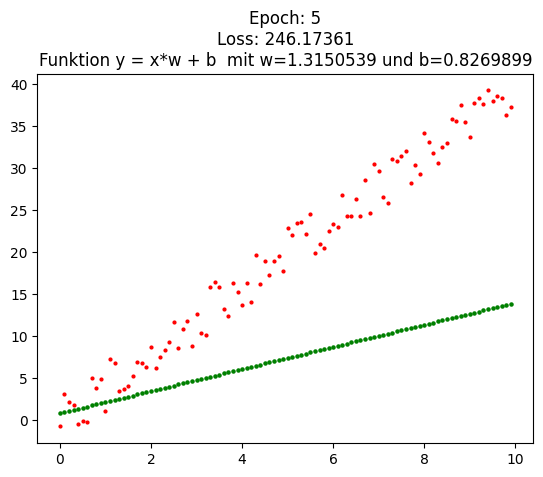

<Figure size 640x480 with 0 Axes>

Current loss: 214.68914794921875


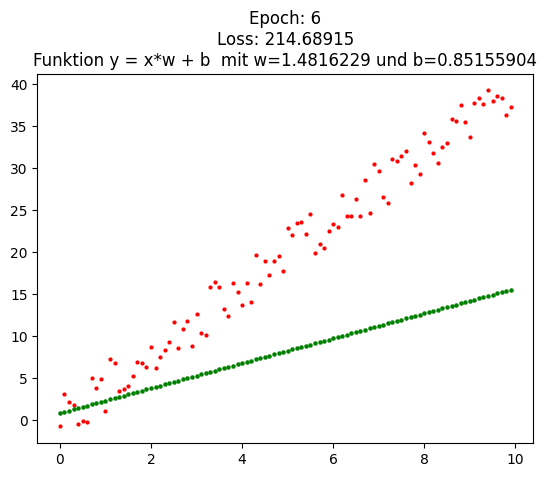

<Figure size 640x480 with 0 Axes>

Current loss: 187.2924346923828


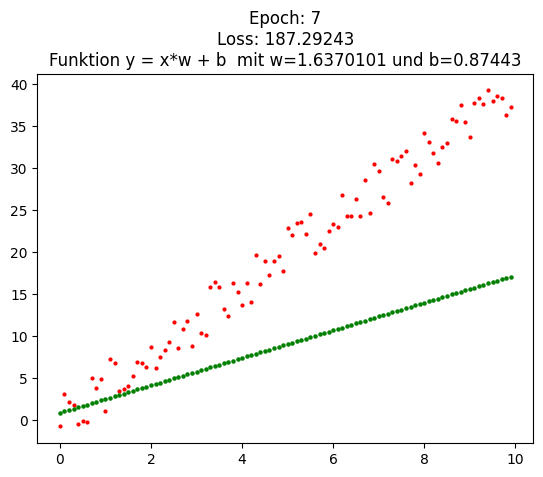

<Figure size 640x480 with 0 Axes>

Current loss: 163.45269775390625


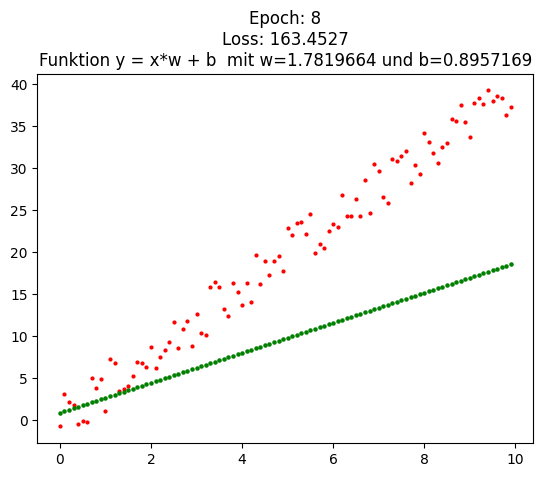

<Figure size 640x480 with 0 Axes>

Current loss: 142.70816040039062


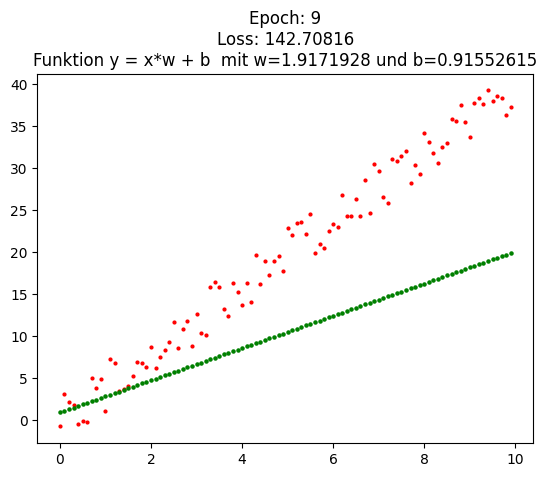

<Figure size 640x480 with 0 Axes>

Current loss: 124.65692138671875


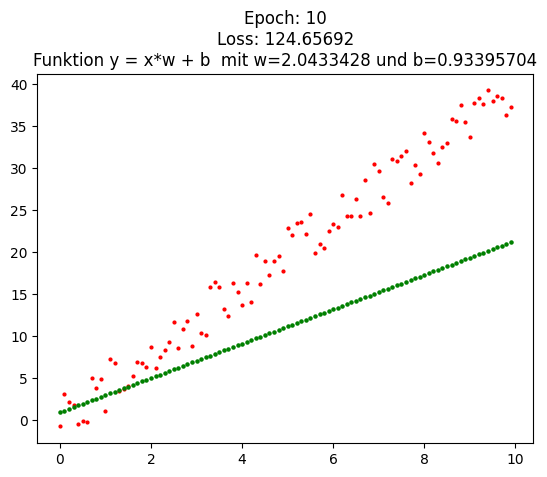

<Figure size 640x480 with 0 Axes>

Current loss: 108.94928741455078


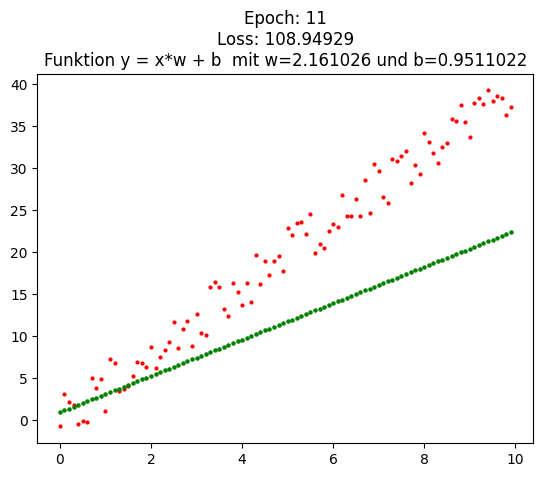

<Figure size 640x480 with 0 Axes>

Current loss: 95.28101348876953


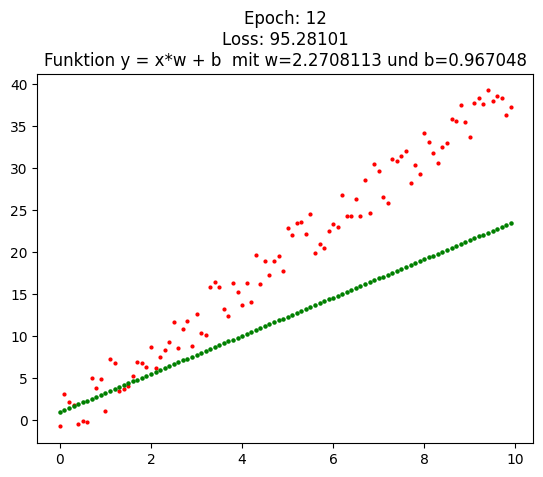

<Figure size 640x480 with 0 Axes>

Current loss: 83.38727569580078


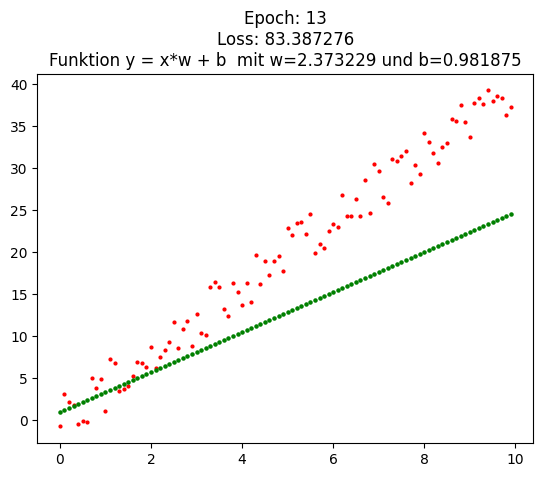

<Figure size 640x480 with 0 Axes>

Current loss: 73.03771209716797


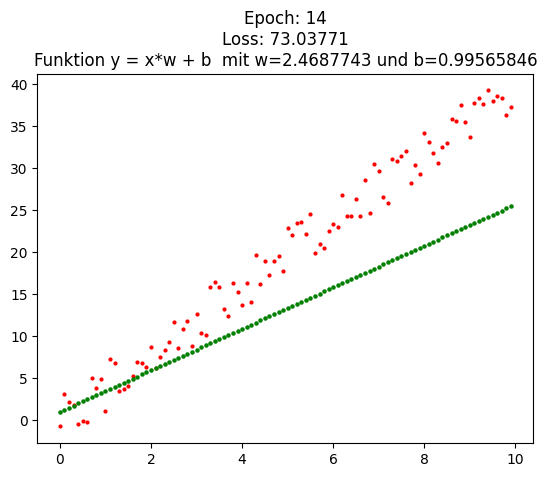

<Figure size 640x480 with 0 Axes>

Current loss: 64.03180694580078


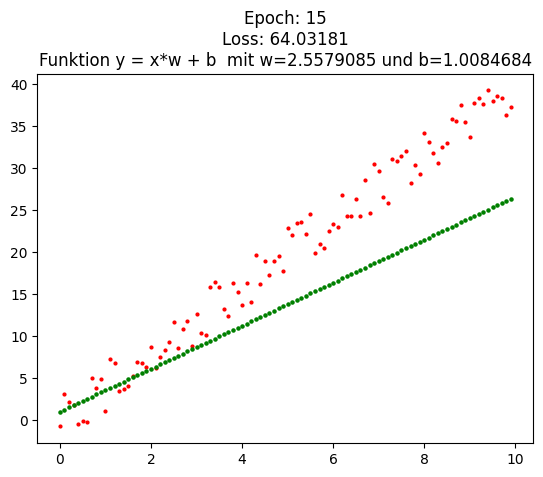

<Figure size 640x480 with 0 Axes>

Current loss: 56.19514083862305


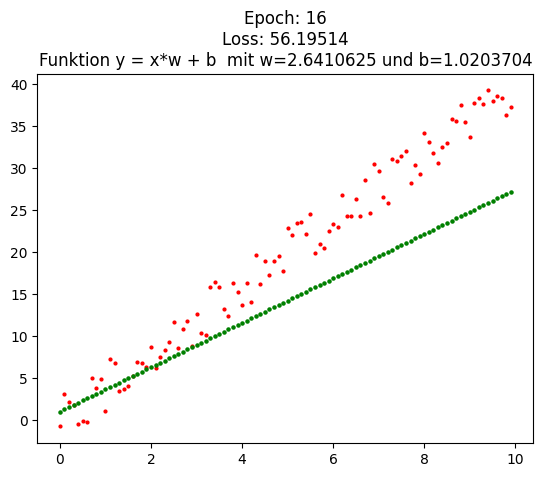

<Figure size 640x480 with 0 Axes>

Current loss: 49.375877380371094


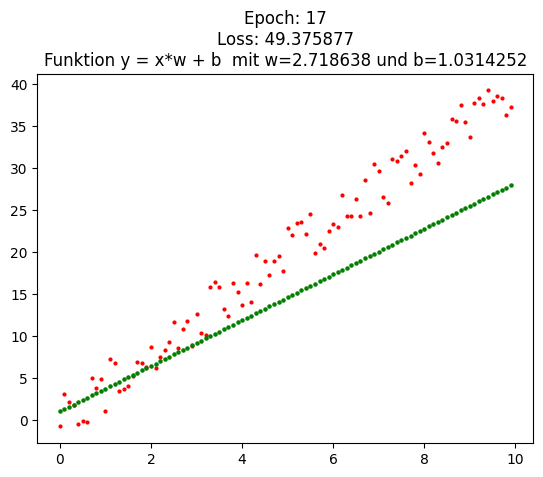

<Figure size 640x480 with 0 Axes>

Current loss: 43.44192886352539


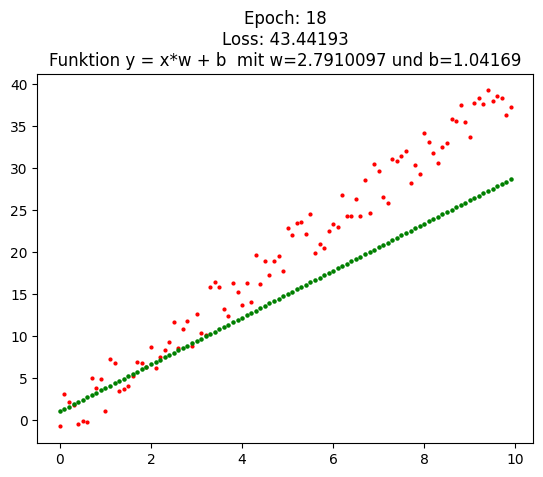

<Figure size 640x480 with 0 Axes>

Current loss: 38.27833557128906


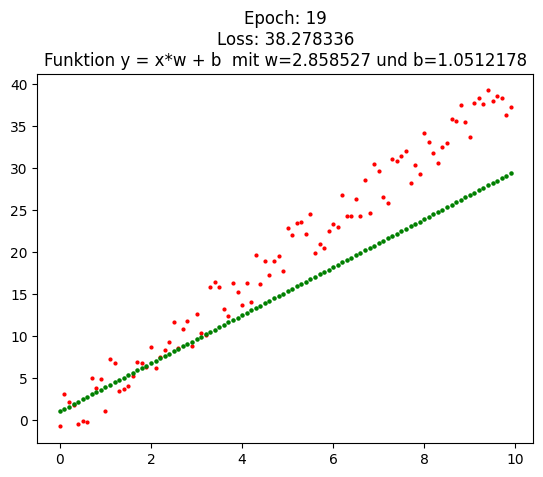

<Figure size 640x480 with 0 Axes>

Current loss: 33.78511047363281


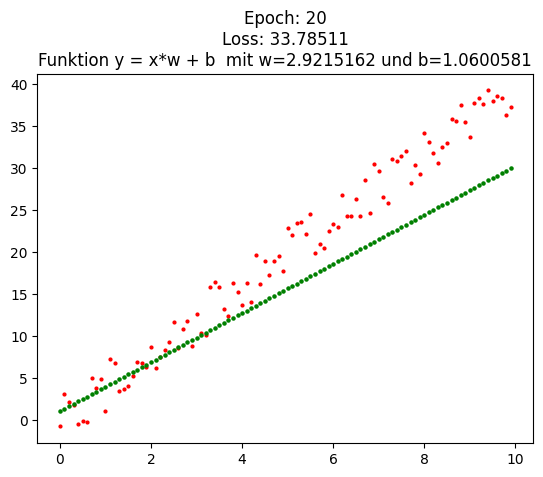

<Figure size 640x480 with 0 Axes>

Current loss: 29.875185012817383


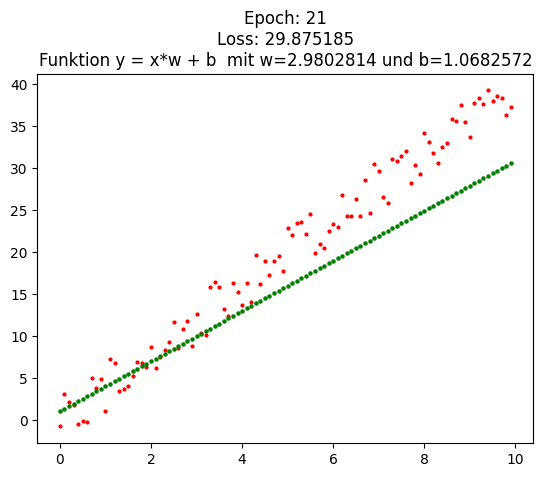

<Figure size 640x480 with 0 Axes>

Current loss: 26.472850799560547


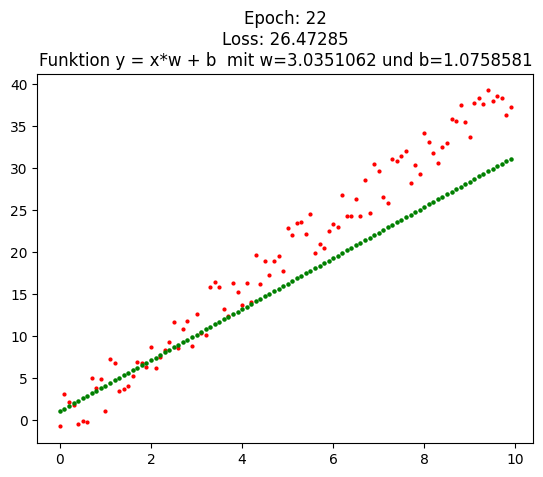

<Figure size 640x480 with 0 Axes>

Current loss: 23.512187957763672


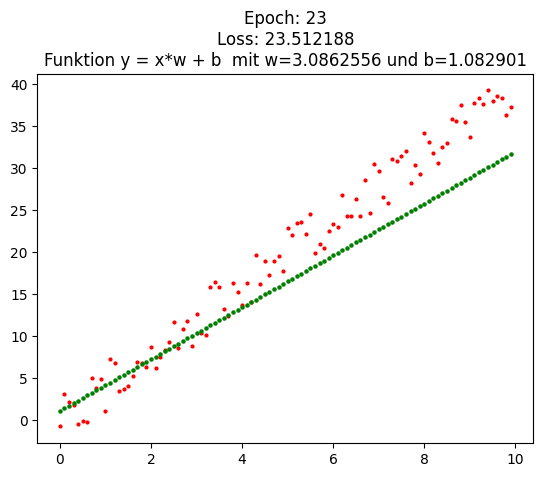

<Figure size 640x480 with 0 Axes>

Current loss: 20.935850143432617


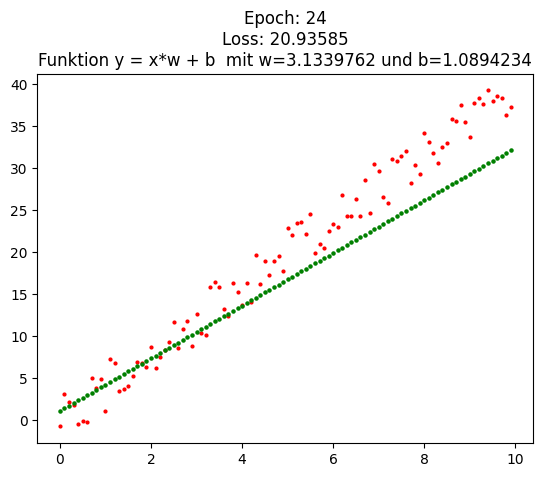

<Figure size 640x480 with 0 Axes>

In [27]:
# Trainingsschleife
for epoch in range(0,25):
    # Version 1:
    loss = train_with_optimizers(model, input,output)
    # Version 2:
    # loss = train(model,input,output)
    print("Current loss: {}".format(loss.numpy()))
    predicted_output = model(input) 
    redraw_curve(input,output,predicted_output,epoch,loss)

In [28]:
plt.show(block=True) 
print("Vorhersage Wert für w: " + str(model.W.numpy()))

Vorhersage Wert für w: 3.1339762
